<a href="https://colab.research.google.com/github/SalmaNurKeya/Blood-Pressure/blob/main/blood_Pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/archive (3).zip')

In [3]:
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [5]:
obj_col= df.select_dtypes(include='object').columns
print(obj_col)

Index([], dtype='object')


In [7]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Sex', 'Smoking']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [8]:

df.isnull().sum()

,0
Patient_Number,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Genetic_Pedigree_Coefficient,92
Age,0
BMI,0
Sex,0
Pregnancy,1558
Smoking,0
Physical_activity,0


In [10]:
X = df.drop('Blood_Pressure_Abnormality', axis=1)
y = df['Blood_Pressure_Abnormality']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
#Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Predict
y_pred = knn.predict(X_test)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit and transform on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform on the testing data
X_test_imputed = imputer.transform(X_test)

# Now train the KNN model with the imputed data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train)

# Predict
y_pred = knn.predict(X_test_imputed)

In [16]:
#Evaluation with Full Metrics KNN
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test_imputed)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.5050
Precision: 0.4974
Recall: 0.4822
F1 Score: 0.4897
ROC AUC Score: 0.5138
Balanced Accuracy: 0.5047
Matthews Corr Coef: 0.0093


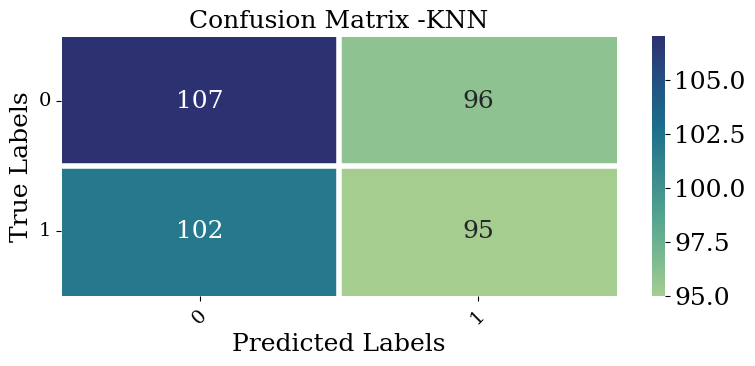

In [17]:
#Confusion Matrix KNN
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix -KNN"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(class_labels, rotation=45, fontsize=14)
ax.set_yticklabels(class_labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()


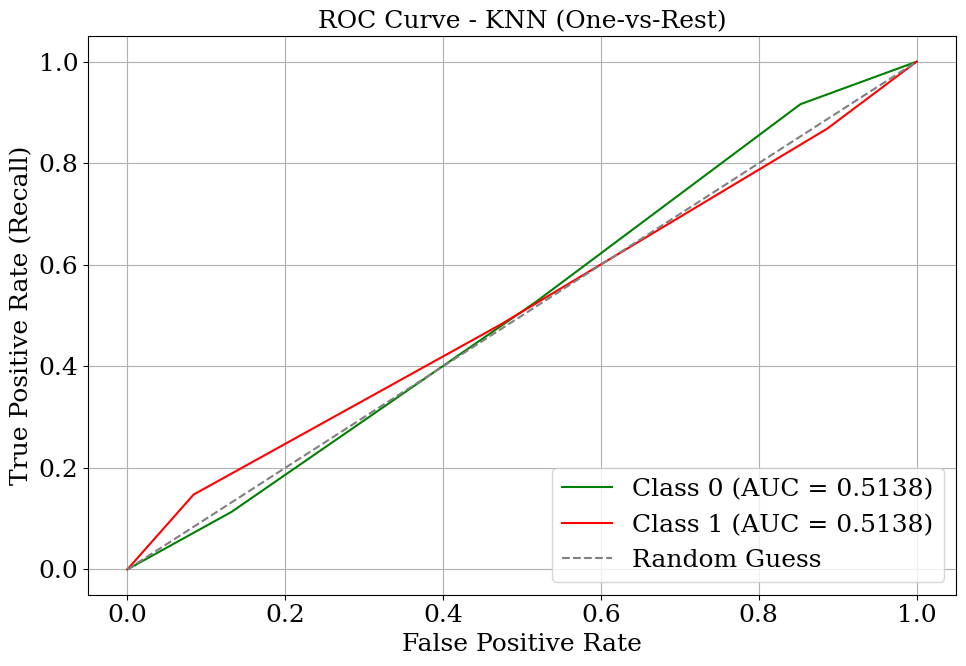

In [19]:
#Roc Curve KNN
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['green','red']  # One color per class

for idx, positive_class in enumerate(knn.classes_):
    # Get the column index of the current class
    class_index = list(knn.classes_).index(positive_class)

    # Get predicted probabilities for the current class using the imputed data
    y_prob_knn = knn.predict_proba(X_test_imputed)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_knn)
    roc_auc = roc_auc_score(y_test_binary, y_prob_knn)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - KNN (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

#Evaluation with Full Metrics Decision tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf .predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.8250
Precision: 0.8470
Recall: 0.7868
F1 Score: 0.8158
ROC AUC Score: 0.8244
Balanced Accuracy: 0.8244
Matthews Corr Coef: 0.6512


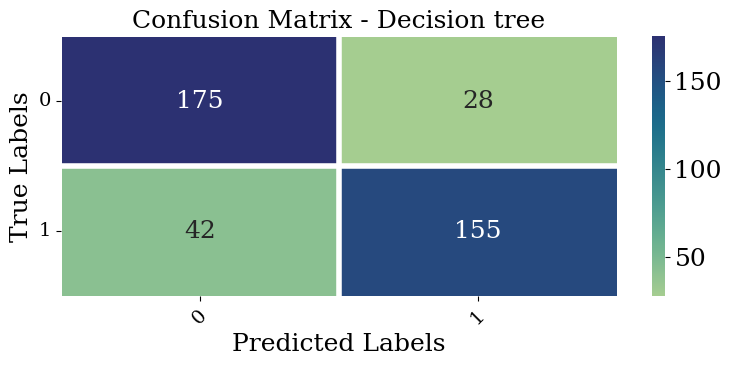

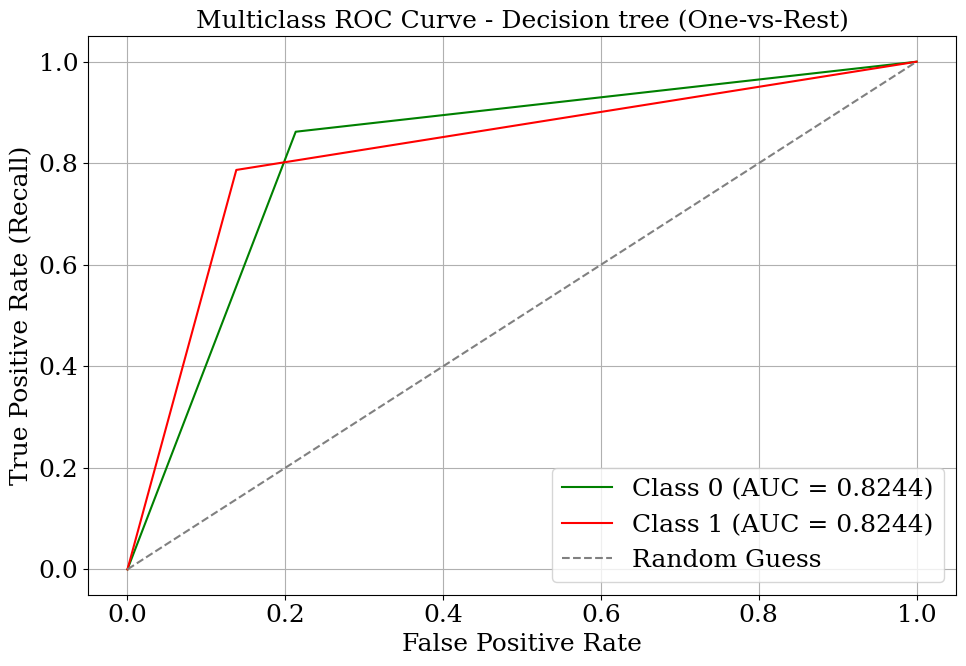

In [21]:
#Confusion Matrix Decision tree
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Decision tree"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

#Roc Curve Decision tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['green','red']  # One color per class

for idx, positive_class in enumerate(clf.classes_):
    # Get the column index of the current class
    class_index = list(clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Decision tree (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Random Froest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

#Evaluation with Full Metrics Random Froest
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.8850
Precision: 0.8872
Recall: 0.8782
F1 Score: 0.8827
ROC AUC Score: 0.9361
Balanced Accuracy: 0.8849
Matthews Corr Coef: 0.7700


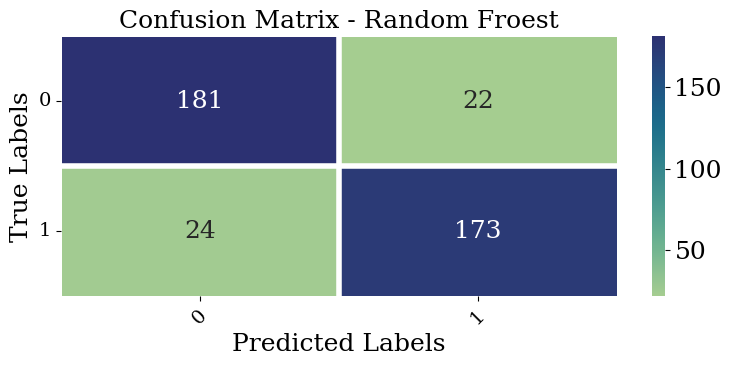

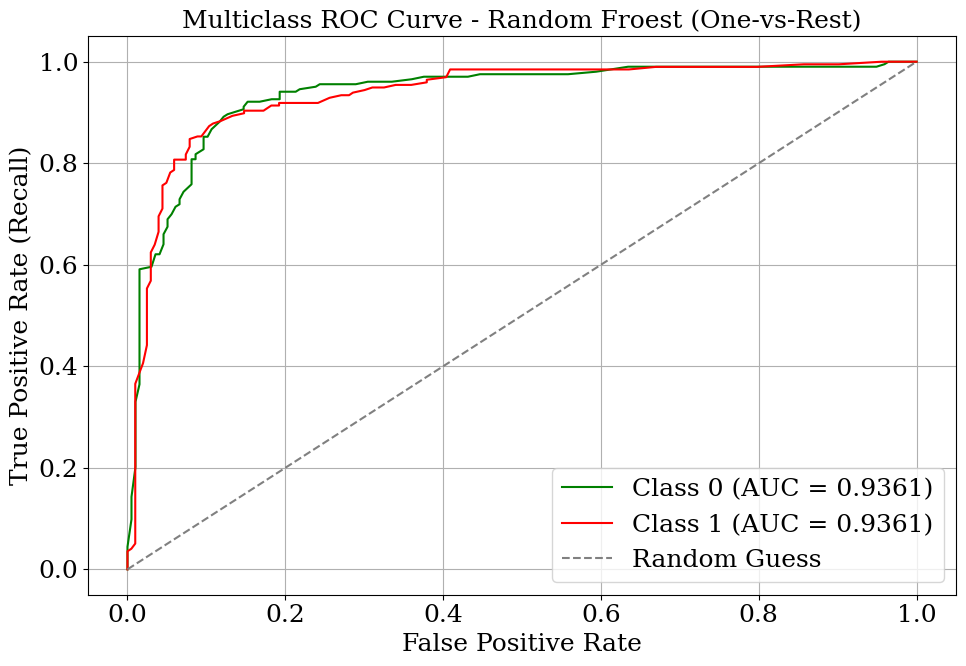

In [23]:
#Confusion Matrix Random Froest
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Random Froest"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(class_labels, rotation=45, fontsize=14)
ax.set_yticklabels(class_labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

#Roc Curve Random Froest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['green','red']  # One color per class

for idx, positive_class in enumerate(rf_clf.classes_):
    # Get the column index of the current class
    class_index = list(rf_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = rf_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Random Froest (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



In [25]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train_imputed, y_train)

# Step 5: Predict
y_pred = gb_clf.predict(X_test_imputed)

#Evaluation with Full Metrics Gradient Boosting
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, gb_clf.predict_proba(X_test_imputed)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.8925
Precision: 0.9231
Recall: 0.8528
F1 Score: 0.8865
ROC AUC Score: 0.9355
Balanced Accuracy: 0.8919
Matthews Corr Coef: 0.7869


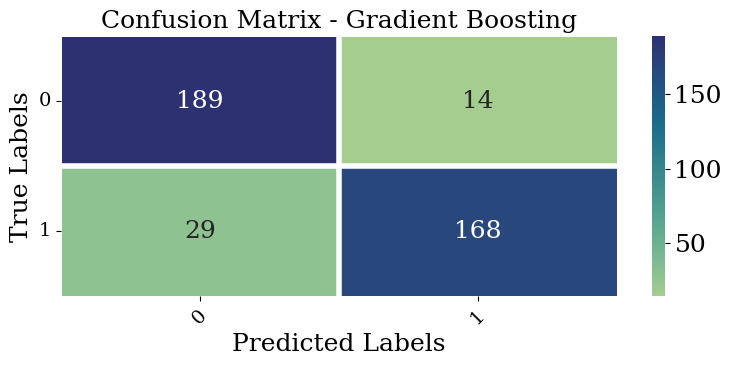

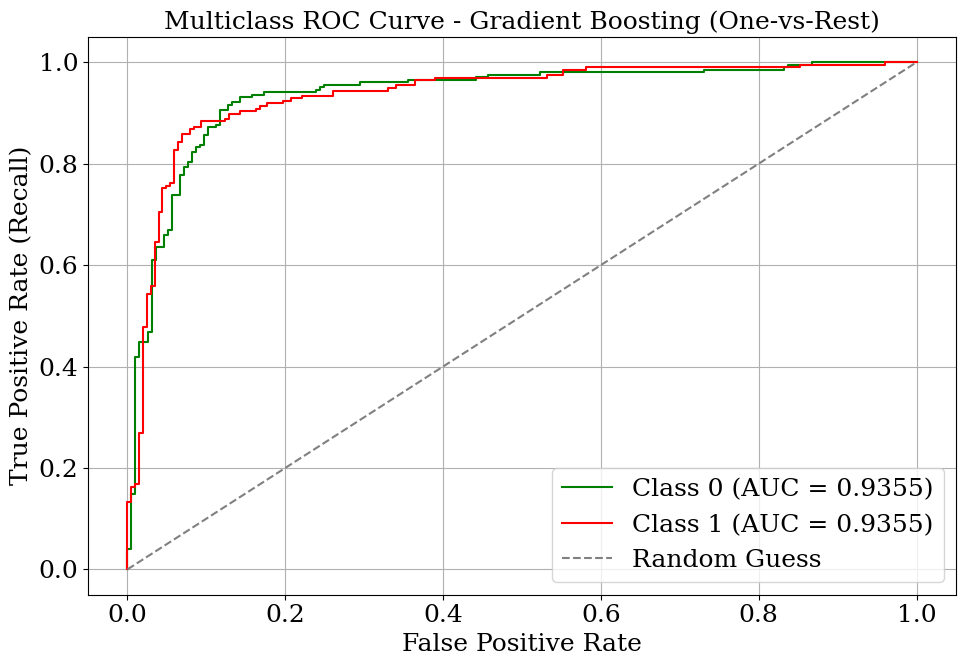

In [27]:
#Confusion Matrix Gradient Boosting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Gradient Boosting"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

#Roc Curve Gradient Boosting
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['green','red']  # One color per class

for idx, positive_class in enumerate(gb_clf.classes_):
    # Get the column index of the current class
    class_index = list(gb_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = gb_clf.predict_proba(X_test_imputed)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Gradient Boosting (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
#Support Vectore Machine
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train_imputed, y_train)

#Predict
y_pred = svm_clf.predict(X_test_imputed)

#Evaluation with Full Metrics Support Vectore Machine
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, svm_clf.predict_proba(X_test_imputed)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.5075
Precision: 0.5000
Recall: 0.1675
F1 Score: 0.2510
ROC AUC Score: 0.5062
Balanced Accuracy: 0.5025
Matthews Corr Coef: 0.0067


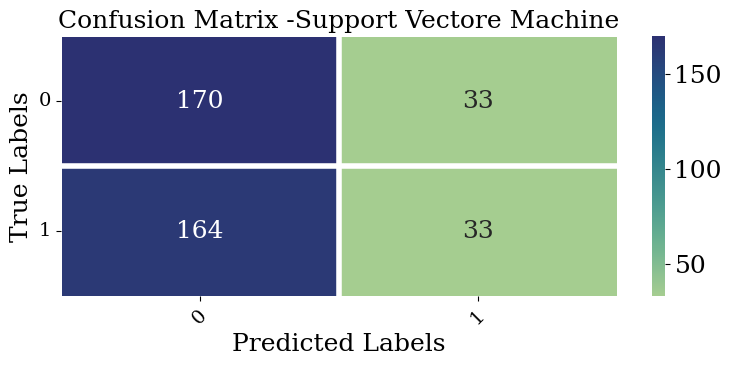

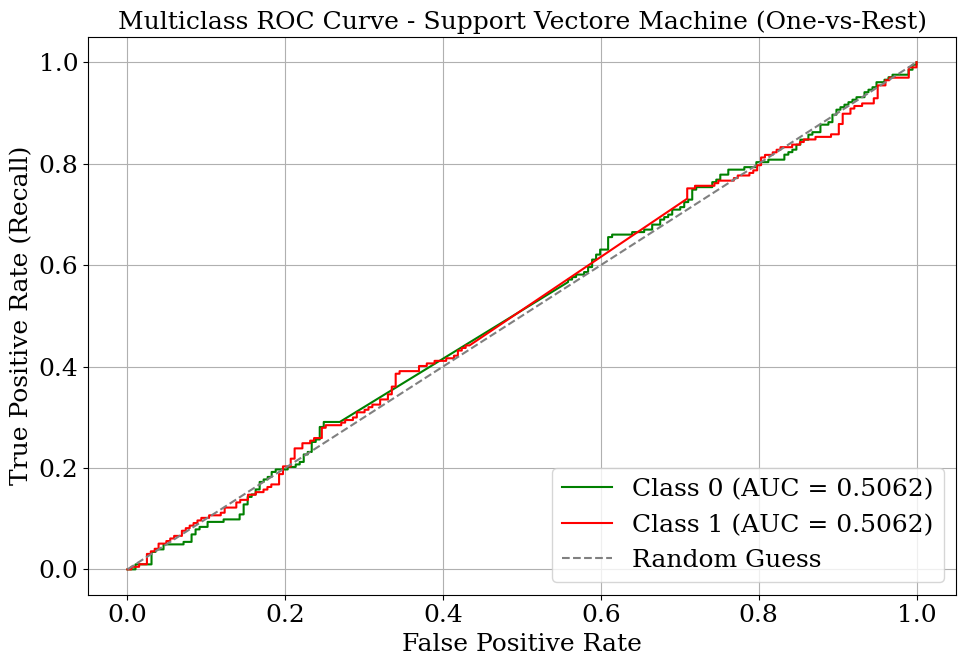

In [31]:
#Confusion Matrix Support Vectore Machine
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix -Support Vectore Machine"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

#Roc Curve Support Vectore Machine
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['green','red']  # One color per class

for idx, positive_class in enumerate(svm_clf.classes_):
    # Get the column index of the current class
    class_index = list(svm_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = svm_clf.predict_proba(X_test_imputed)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Support Vectore Machine (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()